In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 300

In [27]:
def gabor(x, y, f=1.5, sigma=0.25, theta=np.pi / 2, psi=0.0, x0=0.0, y0=0.0):
    xp =  np.cos(theta) * x + np.sin(theta) * y - x0
    yp = -np.sin(theta) * x + np.cos(theta) * y - y0
    E = np.exp(-(np.square(xp) + np.square(yp)) / (2.0 * np.square(sigma)))
    S = np.cos(2.0 * np.pi * f * xp - psi)
    return E * S

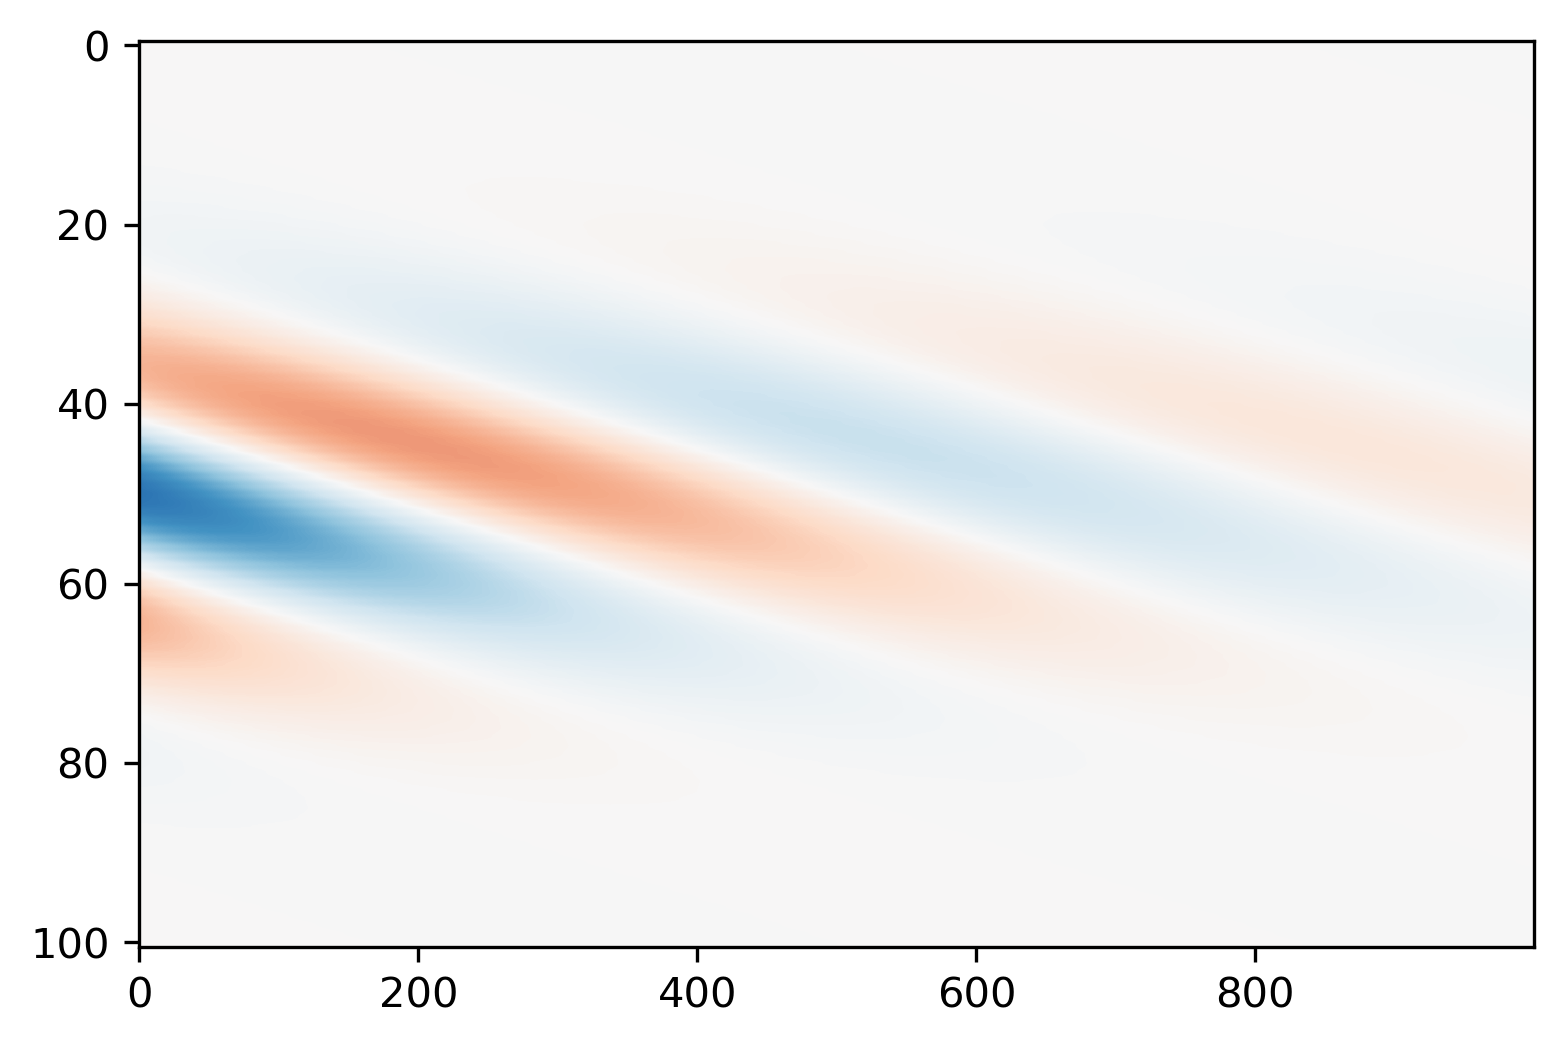

In [29]:
xs, ys = np.linspace(-1, 1, 101), np.linspace(-1, 1, 101)
xss, yss = np.meshgrid(xs, ys)
dt = 1e-3
T = 1.0
ts = np.arange(0, T, dt)
tau = 0.5

E = np.zeros((len(ts), len(xs), len(ys)))
for i, t in enumerate(ts):
    E[i] = gabor(xss, yss, f=1.5, psi=3.0 * np.pi * t) * np.exp(-t / tau)
E_norm = np.linalg.norm(E.reshape(E.shape[0], -1), axis=1)
E = E / (np.sum(E_norm) * dt)

E_norm = np.linalg.norm(E.reshape(E.shape[0], -1), axis=1)

fig, ax = plt.subplots()
ax.imshow(E[:, :, 51].T, vmin=-0.2, vmax=0.2, cmap='RdBu')
ax.set_aspect('auto')

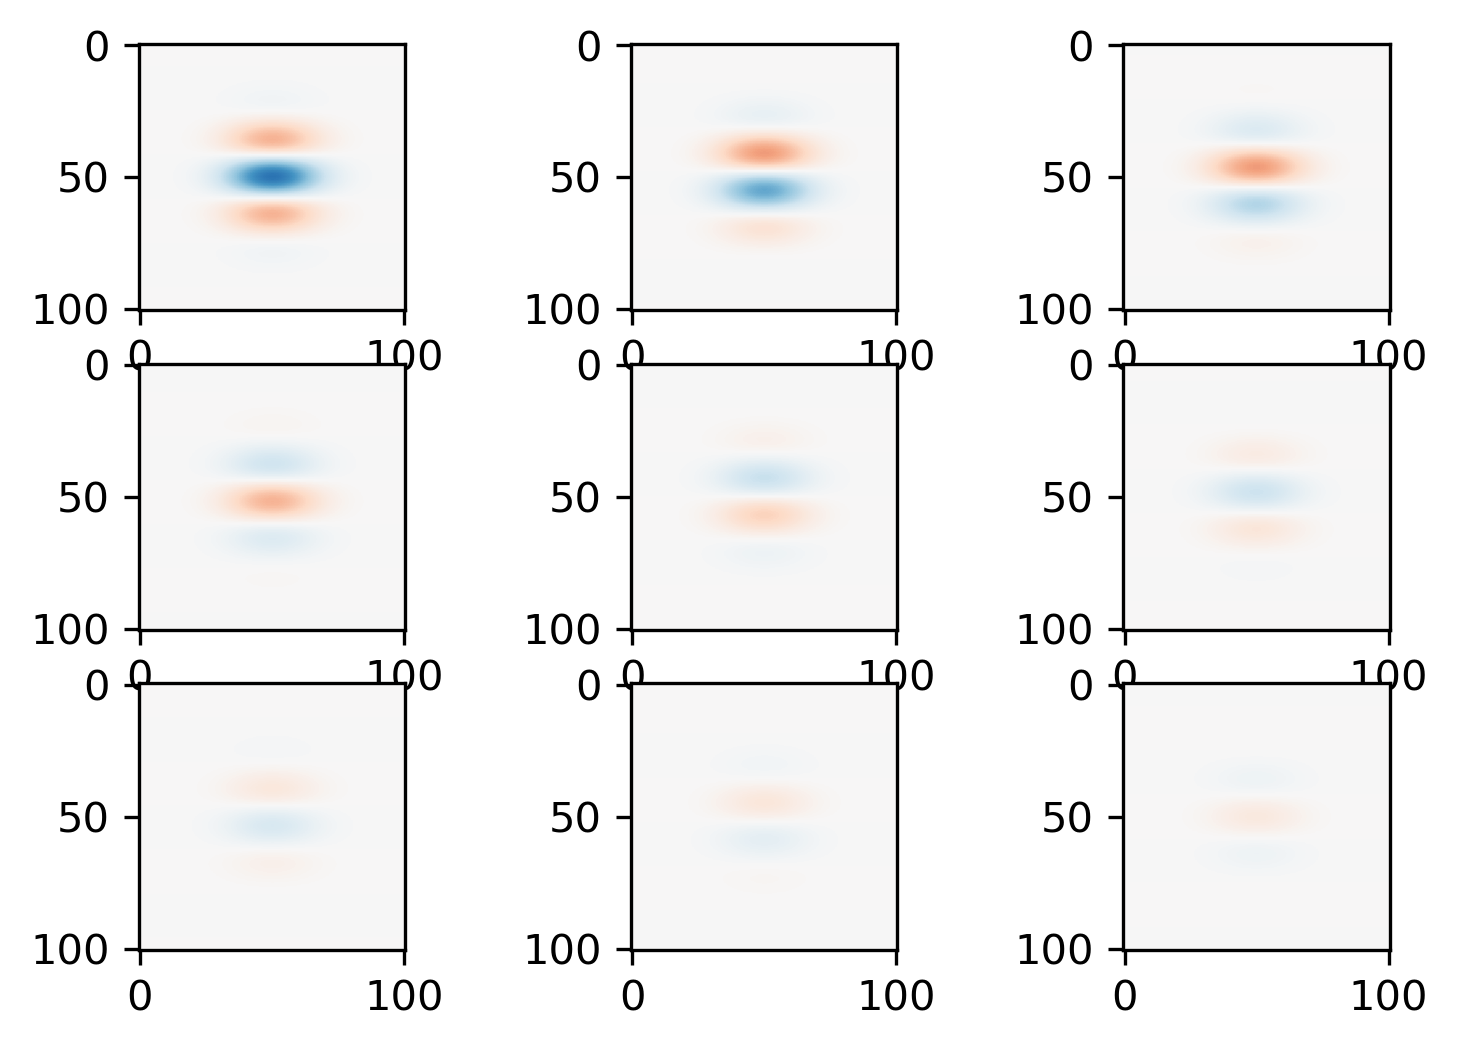

In [30]:
fig, axs = plt.subplots(3, 3)
for i, (t, ax) in enumerate(zip(np.linspace(0, len(ts) - 1, axs.size, dtype=int), axs.flat)):
    ax.imshow(E[t], vmin=-0.2, vmax=0.2, cmap='RdBu')

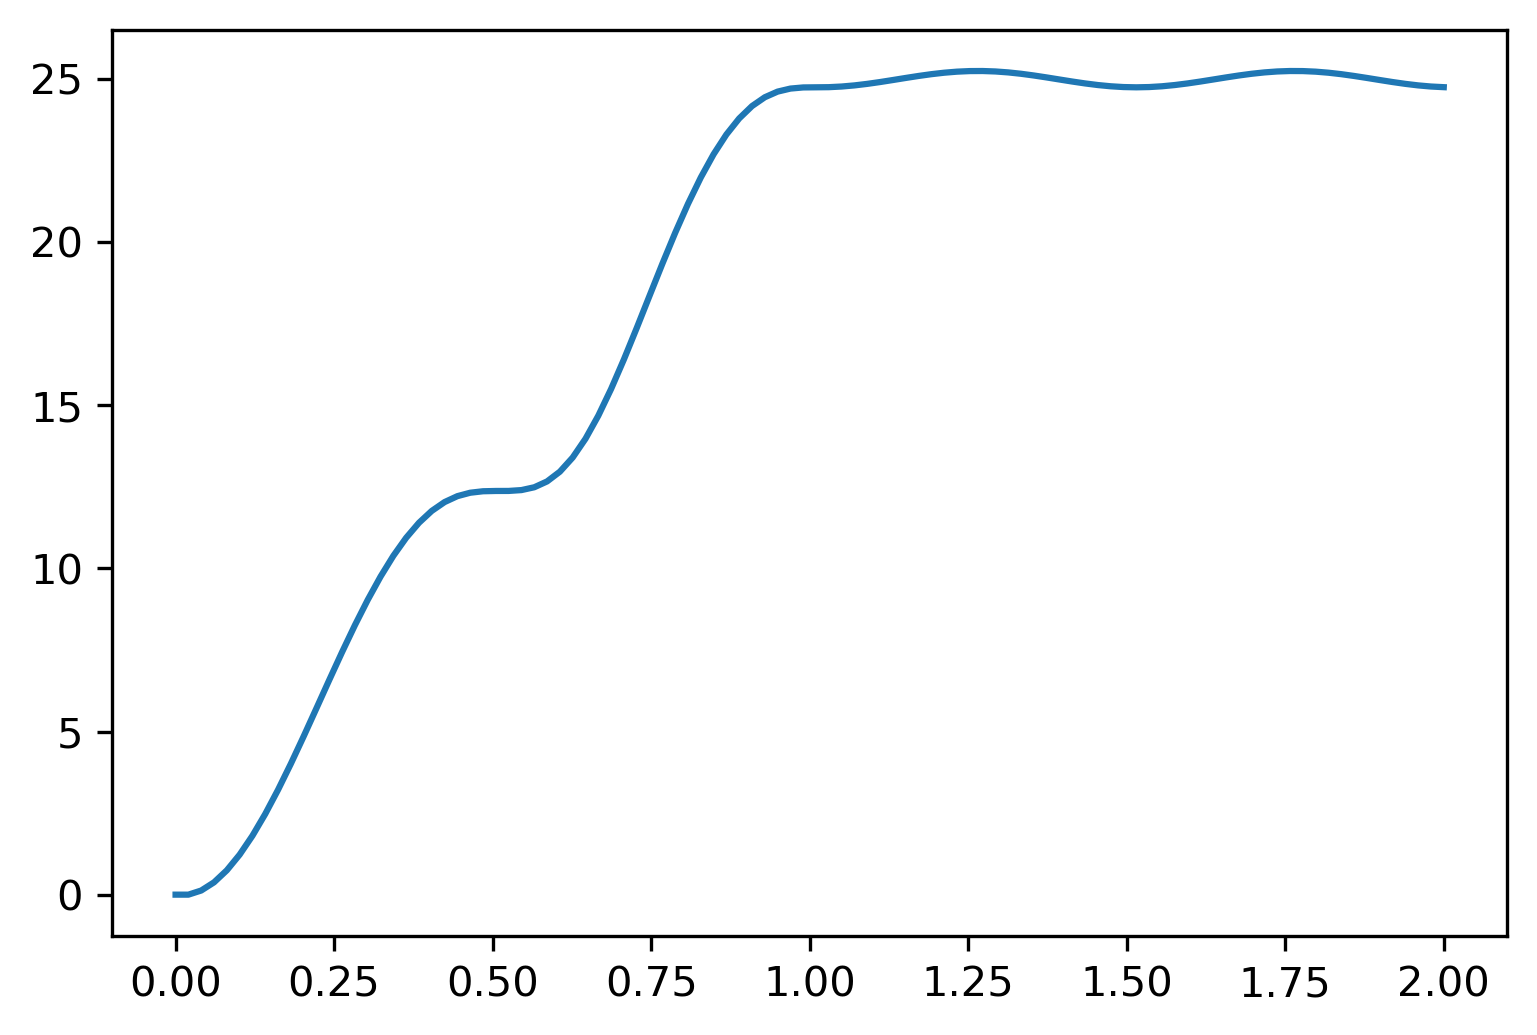

In [36]:
fig, ax = plt.subplots()
ts = np.linspace(-1, 1, 100)
xs0 = np.sin(2.0 * np.pi * ts)
xs1 = np.cos(2.0 * np.pi * ts)
xs0[ts < 0] = 0.0
xs1[ts < 0] = 0.0

ts = np.linspace(0, 2, 100)
ys = np.sin(2.0 * np.pi * ts)

ax.plot(ts, np.sqrt(np.convolve(xs0, ys, 'same') ** 2 + np.convolve(xs1, ys, 'same') ** 2))